In [1]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [2]:
den_train = load_csv("/Users/harmonialeo/Downloads/gen4_train_density.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/gen4_val_density.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/gen4_test_density.csv")

In [3]:
den_all = den_train.append(den_val).append(den_test)
#den_all = den_train

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

No handles with labels found to put in legend.


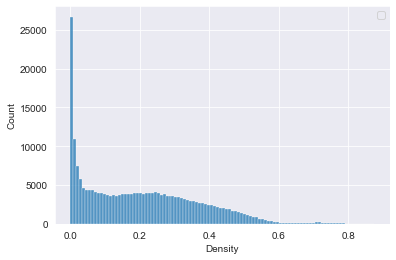

In [5]:
sns.histplot(den_all["Density"])
plt.legend()

No handles with labels found to put in legend.


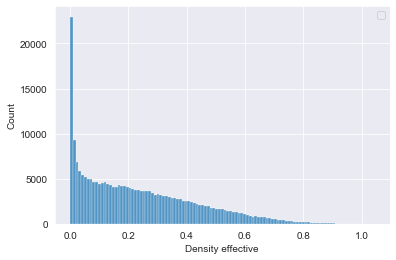

In [6]:
sns.histplot(den_all["Density effective"])
plt.legend()

<AxesSubplot:xlabel='Density effective', ylabel='Count'>

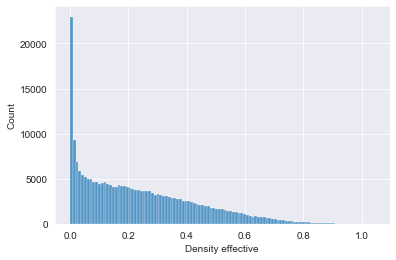

In [7]:
den_eff = den_all["Density effective"] + 1e-8
sns.histplot(den_eff)

In [12]:
from pomegranate import *

model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])
model

<ipython-input-12-c54144569287>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[:,None])


{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            3.9308305459025137,
                            11.225000417646893
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                   

<ipython-input-13-a84448b09793>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.lineplot(den_eff, model.distributions[0].probability(den_eff[:,None]), label="Distribution 1")
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-a84448b09793>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.lineplot(den_eff, model.distributions[1].probability(den_eff[:,None]), label="Distribution 2")
/Users/harmonialeo/o

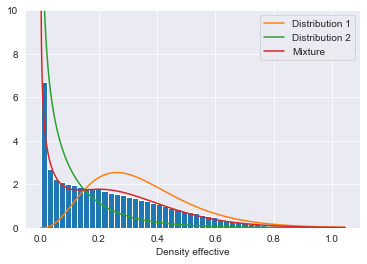

In [13]:
plt.hist(den_eff, bins=50, density=True, stacked=True)
sns.lineplot(den_eff, model.distributions[0].probability(den_eff[:,None]), label="Distribution 1")
sns.lineplot(den_eff, model.distributions[1].probability(den_eff[:,None]), label="Distribution 2")
sns.lineplot(den_eff, model.probability(den_eff[:,None]), label="Mixture")
plt.legend()
plt.ylim((0,10))
plt.show()

<AxesSubplot:>

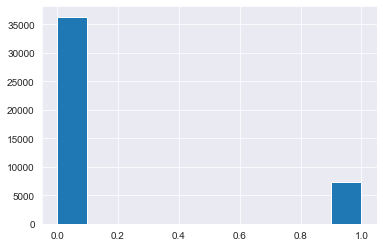

In [10]:
den_test["type"] = np.where(den_test["Density effective"] > 0.03, 0, 1)
den_test["type"].hist()

In [11]:
(den_test["Density effective"] > 0.03).sum()/len(den_test["Density effective"])

0.8321614255285037